# Data Analyzer

## Where the data comes from?

Origin is considered one of the most critical factors in determining the characteristics of coffee, as the natural environment in which the fruits are grown, such as soil type, topography, and climate, has a profound impact on their sensory attributes. 

> La Celia farm is renowned for producing high-quality coffee, thanks in part to its prime location in the Andes Mountains in Manizales city. With an altitude range of 1,850 to 1,900 meters above sea level, the coffee cherries mature slowly, resulting in a rich and complex flavor profile. The farm is surrounded by lush forests, bamboo, and a diverse array of fruits and vegetables, such as orange, mandarine, guava, avocado, and banana. The fertile volcanic soil, due to its proximity to the Cumanday or Nevado del Ruiz volcano, adds to the unique terroir of the farm. The farm boasts around 1 hectare of Castillo coffee trees, with 6,000 plants in total. 
>
> La Celia uses three different types of processing methods: Red Honey (48-hour fermentation in cherry), Yellow Honey (48-hour fermentation in mucilage), and washed (48-hour fermentation in mucilage and washed with water). The honey process is more sustainable than the washed process, as it doesn't require water. The coffee beans are dried in the sun, a process that can take longer due to the rainy conditions in the region, but which ultimately yields a higher-quality product due to the main idea to the interation between the seed embryo and sun rays.

<img src="./La_Celia_farm.JPG" alt="La Celia coffee farm" width="50%">

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Import data
data_path = os.path.join('..', 'data', 'processed_data','data_cleaned.json')
coffee_data = pd.read_json(data_path)

### Data Exploration

In [3]:
print("Data shape: ", coffee_data.shape)
print("Data types: ", coffee_data.dtypes)
print("Data head: ", coffee_data.head())

Data shape:  (53, 18)
Data types:  Acidez             float64
Almendra sana      float64
Balance            float64
Broca              float64
Cuerpo             float64
Descripcion         object
Dulzura              int64
Fecha               object
Fragancia/Aroma    float64
Humedad            float64
ID                   int64
Pasilla            float64
Puntaje Catador    float64
Puntaje Total      float64
Sabor              float64
Sabor Residual     float64
Taza Limpia          int64
Uniformidad          int64
dtype: object
Data head:     Acidez  Almendra sana  Balance  Broca  Cuerpo  \
0    7.50          76.20      7.5   0.16    7.50   
1    7.75          79.10      7.5   2.05    7.50   
2    7.75          73.65      7.5   0.10    7.50   
3    7.50          80.40      7.5   0.10    7.50   
4    7.25          78.70      7.5   1.55    7.25   

                                         Descripcion  Dulzura       Fecha  \
0  ['Fragancia: N/A', 'Aroma: Frutal', 'herbales,...       10  

> ### 3 types of information about coffee:
> **Physical properties**: Almendra sana, Pasilla, Humedad, Broca. *Presented as a percentage %*
>
> **Quantitative atributes** (Scored by a Q Grader: Professional coffee taster): Balance, Cuerpo, Dulzura, Fragancia/Aroma, Sabor, Sabor Residual, Taza limpia, Uniformidad. *The score is going from 1 (minimum) and 10 (maximum)*
>
> **Qualitative attributes**: Related to the coffee sensorial attributes in flavor, fragrance and aroma.

In [4]:
coffee_data.describe()

,Acidez,Almendra sana,Balance,Broca,Cuerpo,Dulzura,Fragancia/Aroma,Humedad,ID,Pasilla,Puntaje Catador,Puntaje Total,Sabor,Sabor Residual,Taza Limpia,Uniformidad
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.0,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.0,53.0
mean,7.594340,76.774528,7.613208,1.129057,7.537736,10.0,7.660377,10.394340,2249.150943,2.896792,7.542453,83.089623,7.547170,7.594340,10.0,10.0
std,0.209317,3.709611,0.232906,0.966049,0.210290,0.0,0.225183,0.956439,372.480479,2.318487,0.200575,1.253931,0.245423,0.225887,0.0,0.0
min,7.000000,61.300000,7.000000,0.000000,7.000000,10.0,7.000000,7.700000,1255.000000,0.700000,7.000000,79.000000,7.000000,7.000000,10.0,10.0
25%,7.500000,75.050000,7.500000,0.450000,7.500000,10.0,7.500000,9.800000,2043.000000,1.450000,7.500000,82.500000,7.500000,7.500000,10.0,10.0
50%,7.500000,76.650000,7.750000,1.000000,7.500000,10.0,7.750000,10.400000,2291.000000,2.350000,7.500000,83.000000,7.500000,7.500000,10.0,10.0
75%,7.750000,79.750000,7.750000,1.550000,7.750000,10.0,7.750000,10.900000,2533.000000,3.600000,7.750000,84.000000,7.750000,7.750000,10.0,10.0
max,8.000000,82.100000,8.000000,4.050000,8.000000,10.0,8.000000,13.200000,2974.000000,14.050000,8.000000,86.000000,8.000000,8.000000,10.0,10.0


> ## Histogram Information 
>> **Physical properties**:
>> - *Almendra sana:* The majority of values fall within ranges considered healthy for coffee seeds.
>> - *Broca, pasilla:* These variables do not significantly influence the characteristics of the coffee samples.
>> - *Humedad:* Represents the moisture content of the seeds. The plot suggests that most of the coffee samples fall within the optimal range of dehydration (10% - 12%).

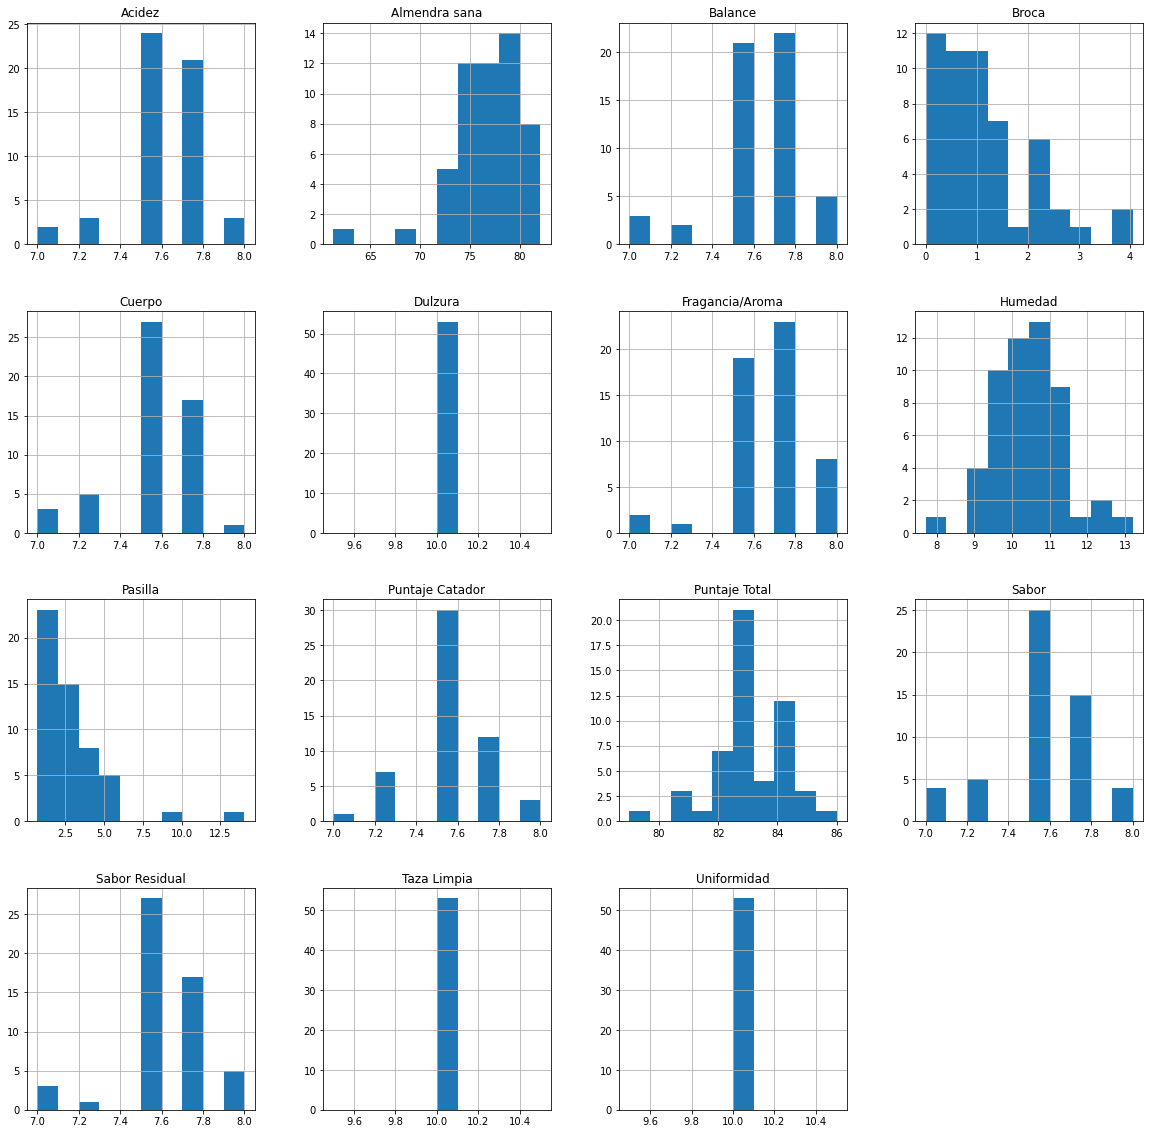

In [5]:
coffee_data.drop("ID", axis=1, inplace=True)
coffee_data.sort_values("Fecha", inplace=True)
coffee_data.hist(bins=10, figsize=(20,20));

>> **Quantitative attributes:**
>> - *Dulzura, Taza limpia, Uniformidad:* These 3 coffee attributes achieved the maximum score, indicating a high level of consistency in the coffee's quality. This means that the coffee is notably sweet, uncontaminated, and has a consistent flavor across the different cups of the analyzed sample.
>> - *Acidez, Balance, Cuerpo, Fragancia/Aroma, Sabor, Sabor Residual*: The distribution of values for these coffee attributes is mainly concentrated around the center of the plot, as they are inherently linked to the 'Puntaje Total'. To better understand how these variables have evolved over time, further analysis is needed.

## Improvement in coffee processing
The coffee growers at La Celia farm have been actively pursuing specialty coffees since 2019 through experimentation with new fermentation techniques, flora additions, and good agriculture practices. Our analysis of the data provides them with valuable feedback on the effectiveness of their efforts towards improving coffee quality. To answer this question, we need to create two plots: one showing the average "Total Score" over time, and the other displaying the average "Puntaje Catador" as a function of the years.

> ### Average Total score
>Total score considers the sum of: Acidez, Cuerpo, Dulzura, Balance, Sabor, Sabor Residual, Puntaje Catador, Fragancia/Aroma, Taza limpia, Uniformidad
>
> This plot considers the average 

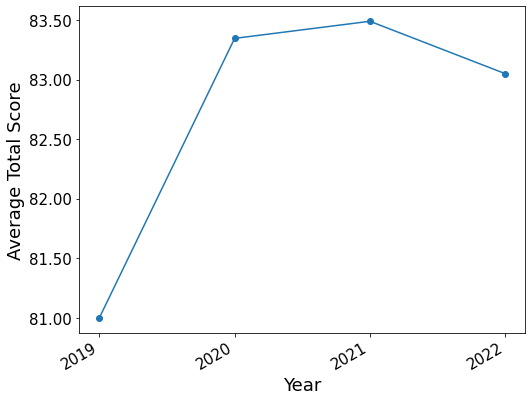

In [11]:
total_score = coffee_data[["Fecha", "Puntaje Total"]].sort_values("Fecha")
total_score["Fecha"] = pd.to_datetime(total_score["Fecha"], format='%d/%m/%Y')
total_score = total_score.groupby(total_score["Fecha"].dt.year)["Puntaje Total"].mean()
plt.figure(figsize=(8,6))
plt.plot(total_score.index, total_score.values, marker="o")
plt.gca().yaxis.set_major_formatter("{:.2f}".format)
plt.xlabel("Year", size=18)
plt.ylabel("Average Total Score", size=18)
plt.xticks(total_score.index, rotation=30, ha="right", size=15)
plt.yticks(size=15)
plt.show();

The trend shown in the above figure clearly indicates the positive influence of the efforts made by the coffee growers of La Celia farm in achieving high-quality coffee profiles. This information provides them with a valuable indicator that their coffee processing methods are significantly enhancing the quality of their coffee beans.

>### Average Coffee Taster Score
>Another parameter worth investigating in greater depth is the coffee taster score, as it is the individual responsible for assessing the coffee based on both quantitative variables, (such as those mentioned above), as well as qualitative variables that are related to the sensory attributes.

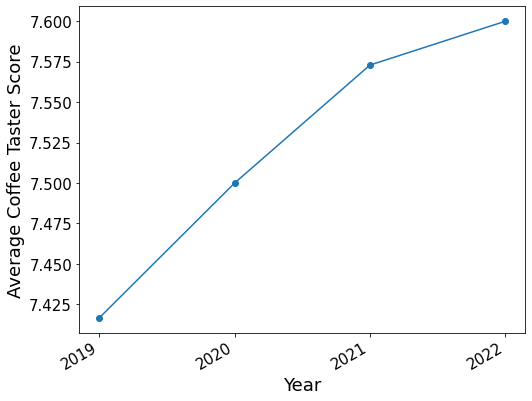

In [13]:
coffee_taster_score = coffee_data[["Fecha", "Puntaje Catador"]].sort_values("Fecha")
coffee_taster_score["Fecha"] = pd.to_datetime(coffee_taster_score["Fecha"], format='%d/%m/%Y')
coffee_taster_score = coffee_taster_score.groupby(coffee_taster_score["Fecha"].dt.year)["Puntaje Catador"].mean()
plt.figure(figsize=(8,6))
plt.plot(coffee_taster_score.index, coffee_taster_score.values, marker="o")
plt.xlabel("Year", size=18)
plt.ylabel("Average Coffee Taster Score", size=18)
plt.xticks(coffee_taster_score.index, rotation=30, ha="right", size=15)
plt.yticks(size=15)
plt.show();

#plotly, dash

- Generar columnas frangancia, aroma, taza (idea > regex, apply, expand usando el df DATA pandas)
- EDA > hist agrupado por categorias i.e cuales son los valores de almendra sana para diferente fragancias, etc
- Generes diferente viz para prop fisicas, propiedades sensoriales teniendo las diferentes fragancias, etc

### Obtain qualitative data

In [24]:
# description = DATA["Descripcion"].str.split(',')
# description = DATA["Descripcion"]

# print(description.iloc[0][0].split(':')[1])
# print(description.iloc[0])

# df_new = DATA.copy()

DATA['Descripcion'] = DATA['Descripcion'].apply(eval)


# for i in DATA["Descripcion"]:
#     df_new = df_new.assign(
#         Fragancia = DATA["Descripcion"].str.split(',').str.split(':')[1]
#     )

# for fragancia in description:
#     df_new.assign(
#     Fragancia = DATA["Descripcion"].str.split(',').iloc[0][0].split(':')[1]
#     )

# df_new.head()
    
# df_new = DATA.copy()

# df_new = df_new.assign(
#     Fragancia = description.str.split(':').str
# )



SyntaxError: invalid syntax (<string>, line 1)

In [ ]:
df_new = DATA.copy()

df_new = df_new.assign(
    Fragancia = DATA['Descripcion'].str.split(':').str[1],
    Aroma = DATA['Descripcion'].str.split(':').str[1],
    Defecto_Atributo = DATA['Descripcion'].str.split(':').str[1]
)

df_new.head()

Group data by: Fragancia/Aroma

In [ ]:
data_by_fragancia = DATA.loc[:, ~DATA.columns.isin(["ID", "Taza Limpia", "Uniformidad", "Dulzura"])].groupby(["Fragancia/Aroma"]).mean()
# print(data_by_fragancia)

Para crear nuevas columnas en un dataframe de Pandas, puedes utilizar el método .assign(). Este método te permite crear una copia del dataframe y añadir nuevas columnas a esta copia.

Para extraer las palabras que están a la derecha de los dos puntos (:), puedes utilizar la función str.split() y seleccionar el segundo elemento del resultado. Por ejemplo, para extraer la fragancia de la primera fila de tu dataframe, puedes hacer lo siguiente:

In [ ]:
DATA['Fragancia'] = DATA['Descripcion'].str.split(':').str[1]

DATA.head()

Para crear las tres nuevas columnas que has mencionado, primero puedes crear una copia del dataframe original con el método .copy(), y luego añadir las nuevas columnas con el método .assign(). Aquí te dejo un ejemplo de cómo podrías hacerlo:

In [ ]:
df_new = df.copy()

df_new = df_new.assign(
    Fragancia = df['columna'].str.split(':').str[1],
    Aroma = df['columna'].str.split(':').str[1],
    Defecto_Atributo = df['columna'].str.split(':').str[1]
)


In [ ]:
name = ['Fragancia: N/A', '']
print(name[0].split(":")[1])

## Conclusions
